In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
r=int(input('r:'))
d=int(input('d:'))
df=pd.DataFrame({i:100*np.random.random(1000) for i in range(d)})

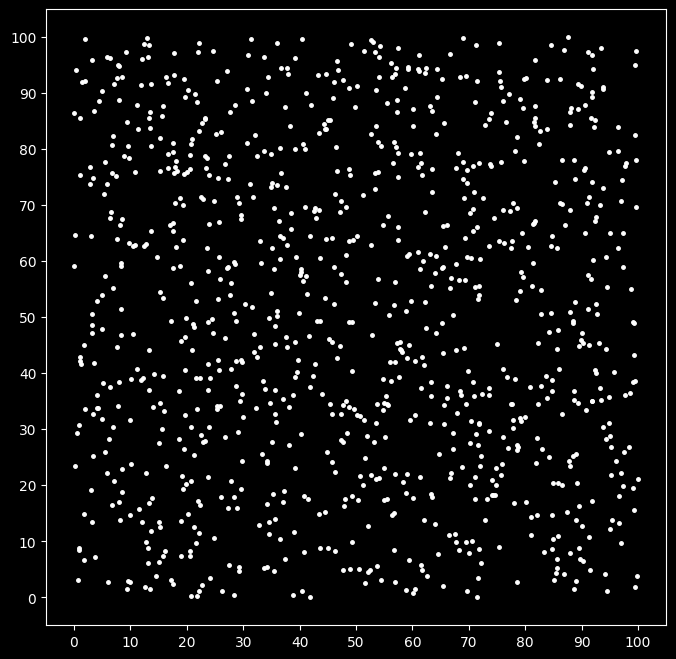

In [40]:
#graph,works only for d=2
plt.style.use('dark_background')
plt.figure(figsize=(8,8))
plt.xticks(np.arange(0,110,10))
plt.yticks(np.arange(0,110,10))
plt.plot(df[0],df[1],'w.',markersize=5)
plt.show()

In [41]:
def dist(df_,d,a,b):
    s=0
    for i in range(d):
        s=s+(df_.loc[a,i]-df_.loc[b,i])**2
    return s**(0.5)

In [42]:
pairs=set([])
for i in range(1000):
    grid=np.array([df.loc[i][j]//r for j in range(d)])
    # df_=df.loc[all((df[k]>=grid[k]-1) & (df[k]<=grid[k]+2) for k in range(d))]
    df_ = df.loc[(df.apply(lambda x: (x.between(grid[x.name] - 1, grid[x.name] + 2)), axis=0)).all(axis=1)]
    for k in df_.index:
        if(i!=k):
            l=dist(df,d,i,k)
            if (k,i) in pairs:
                continue
            else:
                pairs.add((i,k))

In [43]:
pt_pairs=set([])
for (i,j) in pairs:
    a=tuple(df.iloc[i,:])
    b=tuple(df.iloc[j,:])
    pt_pairs.add((a,b))

In [44]:
for key in pt_pairs:
    print(key)

((72.10887588865309, 6.087043869698938), (35.37152741607017, 4.776823781074779))
((66.69642022338851, 97.00358725509726), (34.546553136021, 49.834912991710866))
((44.6027439752265, 83.65002508085931), (23.799581671107084, 41.67362515335504))
((19.245177835154117, 63.81878819850494), (9.935585234395228, 31.603949430512557))
((15.840330873591668, 39.426449851262305), (8.553066478780579, 18.74587304651595))
((67.1893561932128, 26.519620099998498), (34.5964804724195, 13.492229029724301))
((97.27282509694383, 59.03205129635717), (47.2803828290461, 28.062416369287448))
((64.31514402362502, 89.36688278100759), (31.84813681322598, 43.7644499347385))
((86.44367436385751, 70.14244454965254), (44.03493987948258, 36.24953430709298))
((89.95728705996574, 91.18946400823802), (45.73234544393594, 45.48937582403403))
((1.7103338540194746, 44.95709923701969), (0.2491656656772201, 23.509041807825803))
((71.12712671215616, 55.41904313375367), (35.09663767930943, 27.643121904467872))
((87.53474137439282, 9